In [1]:
from app import create_app, db
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    instruments = {b.symbol: b for b in Instrument.find_etfs(100)}
    quote = Quote([*instruments.keys()], 120)
    quote.update_boosts(21, instruments)
    db.session.commit()
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-02-25 to 2019-06-24 - 100'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 8) & (stat['21-mean'] > 0.8) & (stat['21-shrp'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
XLP,63,2.279128,1.533925,1.377161,4.021399
SPLV,63,2.030147,1.370726,1.359484,1.971361
IPAY,63,3.050166,2.525599,1.141709,5.347951
USMV,63,2.045203,1.669484,1.125219,2.180427
PPA,63,2.717626,2.854002,0.893818,4.581305
MTUM,63,1.916874,1.968053,0.889309,2.859384
FINX,63,2.223117,2.368706,0.868175,5.312173
XAR,63,2.609237,3.049486,0.800978,6.769803
VPU,63,1.436676,1.812214,0.700806,3.258989


In [3]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, sr=2)

['XLP'] -0.9500419692241495 1 0.8042797087596598 1.3771608389919046
['XLP', 'SPLV'] -1.6474920838839837 0.48987708710074607 0.5992759100722795 1.3683225405285047


['XLP', 'SPLV']

In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 4, ['XLP', 'SPLV'], sr=0)

['XLP', 'SPLV'] 1.0891529971730256 0.48987708710074607 0.5992759100722795 1.3683225405285047
['XLP', 'SPLV', 'IPAY'] 0.987677089382824 0.6316297252887851 0.7560473640940389 1.2927847491018272
['XLP', 'SPLV', 'IPAY', 'USMV'] 0.6035529158550198 0.7274960546578771 0.6760568611971427 1.250893367881158
['XLP', 'SPLV', 'IPAY', 'PPA'] 0.4072972958338954 0.4111965323500577 0.7961007634838377 1.193043169829674
['XLP', 'SPLV', 'USMV', 'PPA'] 0.28184200444903557 0.44411747087297365 0.637724533576062 1.1889206843223437
['XLP', 'SPLV', 'PPA', 'VPU'] 0.1447709997044075 0.2531183685133363 0.6916526311910712 1.0828173173033726


['XLP', 'SPLV', 'PPA', 'VPU']

In [5]:
quote.setup_mask(['SPLV', 'XLP'])
quote.find_optimal_ratio(21, 2)

     fun: 1.5470925697943878
     jac: array([3.09392206, 3.09459493])
 message: 'Optimization terminated successfully.'
    nfev: 8
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.60898005, 0.39101995])


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


({'SPLV': 0.61, 'XLP': 0.39}, 2.1275, 1.2438)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,63.0,2.124881,1.243392,-1.464820,1.736245,2.273114,2.725186,4.322885,1.574897,2.347700
XLP,63.0,2.279128,1.533925,-2.438597,1.642454,2.722190,3.302938,4.497904,1.377161,4.021399
SPLV,63.0,2.030147,1.370726,-0.950248,1.184766,1.914527,2.935136,4.955301,1.359484,1.971361


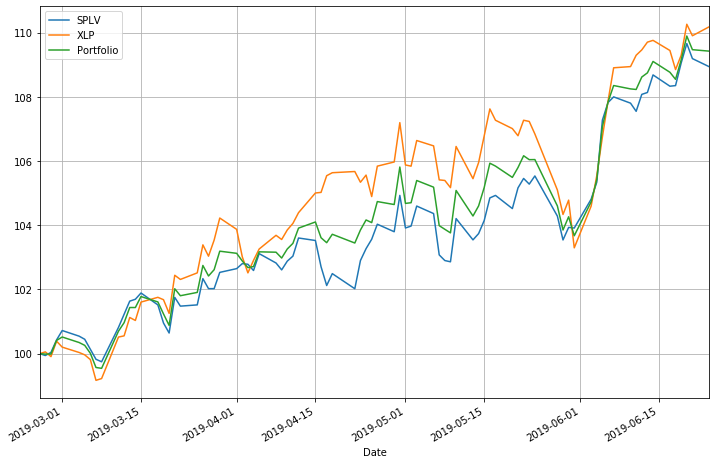

In [6]:
%pylab inline
quote.graph(21, {'SPLV': 0.61, 'XLP': 0.39})